In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
neighborhoods = gpd.read_file('https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip')
neighborhoods['geoid10'] = neighborhoods['geoid10'].astype(float)

In [3]:
df = pd.read_csv('Neighborhoods_with_SNAP_Data.csv')
df

,FID,Neighborhood_2010_FID_BlockG,Neighborhood_2010_STATEFP10,Neighborhood_2010_COUNTYFP10,Neighborhood_2010_TRACTCE10,Neighborhood_2010_BLKGRPCE10,Neighborhood_2010_GEOID10,Neighborhood_2010_NAMELSAD10,Neighborhood_2010_MTFCC10,Neighborhood_2010_FUNCSTAT10,...,SNAP_All_csv_Commute_to_Work__C,SNAP_All_csv_Commute_to_Work__P,SNAP_All_csv_Commute_to_Work__T,SNAP_All_csv_Commute_to_Work__M,SNAP_All_csv_Commute_to_Work__B,SNAP_All_csv_Commute_to_Work__W,SNAP_All_csv_Commute_to_Work__O,SNAP_All_csv_Work_at_Home__2010,SHAPE_Length,SHAPE_Area
0,1,0,42,3,40500,1,420030405001,Block Group 1,G5030,S,...,6.9%,13.3%,0.0%,0.0%,0.0%,62.4%,0.0%,1.2%,11525.904546,7.842997e+06
1,2,1,42,3,40400,1,420030404001,Block Group 1,G5030,S,...,7.2%,11.5%,0.4%,0.0%,2.9%,52.6%,0.4%,4.4%,20945.562570,1.390469e+07
2,3,2,42,3,40200,2,420030402002,Block Group 2,G5030,S,...,1.0%,22.1%,0.0%,0.0%,0.0%,40.8%,0.7%,0.0%,18280.484515,5.998649e+06
3,4,3,42,3,30500,2,420030305002,Block Group 2,G5030,S,...,9.6%,16.5%,2.0%,0.0%,0.0%,6.5%,0.0%,0.0%,15694.771444,7.203631e+06
4,5,5,42,3,20300,1,420030203001,Block Group 1,G5030,S,...,19.1%,18.1%,0.0%,0.0%,0.0%,0.0%,0.0%,9.0%,24019.532672,1.694875e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,265,42,3,563000,4,420035630004,Block Group 4,G5030,S,...,7.9%,14.6%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,9978.225999,3.683820e+06
86,87,298,42,3,563100,3,420035631003,Block Group 3,G5030,S,...,4.7%,0.0%,0.0%,0.0%,0.0%,14.9%,0.0%,0.0%,16308.779881,1.024662e+07
87,88,32,42,3,562600,1,420035626001,Block Group 1,G5030,S,...,17.2%,15.6%,0.0%,18.8%,0.0%,0.0%,0.0%,0.0%,18778.991513,5.579476e+06
88,89,57,42,3,250700,1,420032507001,Block Group 1,G5030,S,...,0.0%,41.0%,0.0%,0.0%,0.0%,13.7%,0.0%,0.0%,11709.518764,6.050817e+06


In [4]:
[c for c in df.columns if 'Edu' in c]

['SNAP_All_csv_Resident_Jobs__Edu',
 'SNAP_All_csv_Jobs_in__Hood__Edu',
 'Edu__Attainment__Less_than_High',
 'Edu__Attainment__High_School_Gr',
 'Edu__Attainment__Assoc__Prof__D',
 'Edu__Attainment__Bachelor_s_Deg',
 'Edu__Attainment__Postgraduate_D',
 'Institutional___Edu____Med_']

In [5]:
def percent_to_float(series):
    return series.str.rstrip('%').astype(float) / 100

attainments = [c for c in df.columns if 'Edu__Attainment' in c]
for a in attainments:
    df[a] = percent_to_float(df[a])
df[attainments]

,Edu__Attainment__Less_than_High,Edu__Attainment__High_School_Gr,Edu__Attainment__Assoc__Prof__D,Edu__Attainment__Bachelor_s_Deg,Edu__Attainment__Postgraduate_D
0,0.236,0.395,0.034,0.149,0.185
1,0.043,0.231,0.153,0.274,0.299
2,0.120,0.467,0.041,0.201,0.172
3,0.276,0.460,0.059,0.137,0.068
4,0.084,0.273,0.124,0.334,0.185
...,...,...,...,...,...
85,0.158,0.470,0.197,0.106,0.070
86,0.097,0.673,0.052,0.153,0.025
87,0.128,0.360,0.244,0.267,0.000
88,0.089,0.724,0.024,0.163,0.000


In [6]:
df['Edu Score'] = df['Edu__Attainment__High_School_Gr'] + 2 * df['Edu__Attainment__Bachelor_s_Deg'] + 4 * df['Edu__Attainment__Postgraduate_D']
df['Edu Score']

0     1.433
1     1.975
2     1.557
3     1.006
4     1.681
      ...  
85    0.962
86    1.079
87    0.894
88    1.050
89    0.527
Name: Edu Score, Length: 90, dtype: float64

In [7]:
neighborhoods['Edu Score'] = 0.0
for i, row in df.iterrows():
    for j, neighborhood in neighborhoods.iterrows():
        if row['Neighborhood_2010_GEOID10'] == neighborhood['geoid10']:
            neighborhoods.at[j, 'Edu Score'] = row['Edu Score']
            break
neighborhoods['Edu Score']

0     1.772
1     2.279
2     0.982
3     1.371
4     0.956
      ...  
85    2.421
86    0.927
87    0.695
88    1.479
89    0.882
Name: Edu Score, Length: 90, dtype: float64

<AxesSubplot:>

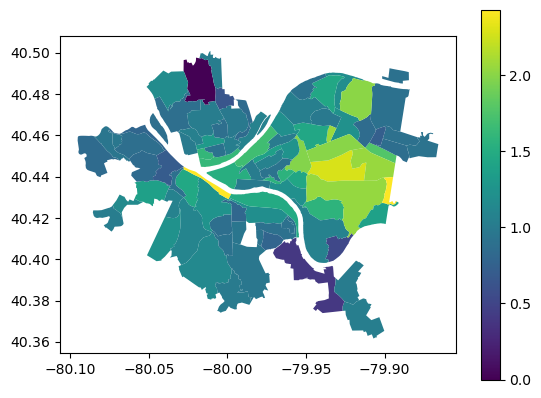

In [8]:
neighborhoods.plot(column='Edu Score', legend=True)

In [9]:
neighborhoods.sort_values(by='Edu Score', ascending=False)[['hood', 'Edu Score']]

,hood,Edu Score
66,South Shore,2.428
85,Regent Square,2.421
1,Squirrel Hill North,2.279
41,Friendship,2.064
59,Point Breeze,2.050
...,...,...
16,Northview Heights,0.645
10,Glen Hazel,0.527
25,Hays,0.398
15,Perry North,0.000
